**BIG DATA: Pré-processamento de Dados**

Download Dados Bolsa Família (recomendação: faça a transferência pelo menos dos últimos 6 meses)

Fonte: https://portaldatransparencia.gov.br/download-de-dados/novo-bolsa-familia

Após essa etapa, concatene em um dataframe 2 meses aleatórios dessa fonte (mês a mês).

Vamos comparar o tempo de processamento das bibliotecas Pandas e Polars:

PANDAS

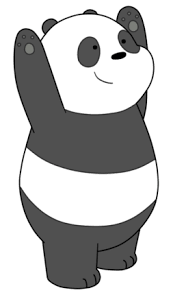

In [5]:
#IMPORTANTE: utilize os dados de 2 meses para evitar a sobrecarga do programa!

import pandas as pd
import time

arquivo1=pd.read_csv("202401_NovoBolsaFamilia.csv", sep=";", encoding="latin-1") #caminhos dos arquivos
arquivo2=pd.read_csv("202402_NovoBolsaFamilia.csv", sep=";", encoding="latin-1")

inicio_tempo=time.time() #marcação do tempo de processamento
df_pandas=pd.concat([arquivo1,arquivo2])

display(df_pandas.head())

print("Tempo de execução com Pandas:", time.time() - inicio_tempo, "segundos") 

,MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
0,202401,202303,AC,139,RIO BRANCO,***.511.972-**,1.629112e+10,JANAINA FERREIRA DA SILVA,"800,00"
1,202401,202303,BA,3329,ANGUERA,***.909.745-**,2.047443e+10,TACIANE MARQUES DA SILVA,"750,00"
2,202401,202303,BA,3731,MONTE SANTO,***.872.338-**,2.019538e+10,MAILSON DOS SANTOS SILVA,"650,00"
3,202401,202303,BA,3761,NOVA VICOSA,***.665.905-**,1.272359e+10,IRENI RICARDO GERALDO,"650,00"
4,202401,202303,BA,3849,SALVADOR,***.932.435-**,2.002458e+10,ELIENE GOMES DOS SANTOS,"850,00"


Tempo de execução com Pandas: 6.658054828643799 segundos


POLARS

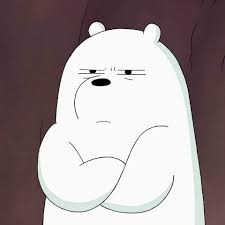

In [6]:
import polars as pl

arquivo1=pl.read_csv("202401_NovoBolsaFamilia.csv", separator=";", encoding="latin-1") #caminhos dos arquivos
arquivo2=pl.read_csv("202402_NovoBolsaFamilia.csv", separator=";", encoding="latin-1")

inicio_tempo=time.time() #marcação do tempo de processamento
df_polars=pl.concat([arquivo1,arquivo2])

display(df_polars.head())

print("Tempo de execução com Polars:", time.time() - inicio_tempo, "segundos") 

MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
i64,i64,str,i64,str,str,i64,str,str
202401,202303,"""AC""",139,"""RIO BRANCO""","""***.511.972-**""",16291115205,"""JANAINA FERREIRA DA SILVA""","""800,00"""
202401,202303,"""BA""",3329,"""ANGUERA""","""***.909.745-**""",20474429886,"""TACIANE MARQUES DA SILVA""","""750,00"""
202401,202303,"""BA""",3731,"""MONTE SANTO""","""***.872.338-**""",20195376298,"""MAILSON DOS SANTOS SILVA""","""650,00"""
202401,202303,"""BA""",3761,"""NOVA VICOSA""","""***.665.905-**""",12723589082,"""IRENI RICARDO GERALDO""","""650,00"""
202401,202303,"""BA""",3849,"""SALVADOR""","""***.932.435-**""",20024584007,"""ELIENE GOMES DOS SANTOS""","""850,00"""


Tempo de execução com Polars: 0.08762693405151367 segundos


PARQUET: formato para otimizar o processamentos doa dados.

In [7]:
import pandas as pd
import polars as pl
import time

In [11]:
#Exportação para .parquet com Pandas:

inicio_tempo=time.time()
parquet1=df_pandas.to_parquet=("202401_NovoBolsaFamilia_pandas.parquet")
print("Tempo de exportação com Pandas:", time.time() - inicio_tempo, "segundos")
print(parquet1)

Tempo de exportação com Pandas: 0.0 segundos
202401_NovoBolsaFamilia_pandas.parquet


In [12]:
#Exportação para .parquet com Polars:

inicio_tempo=time.time()
parquet2=df_polars.write_parquet=("202401_NovoBolsaFamilia_polars.parquet")
print("Tempo de exportação com Polars:", time.time() - inicio_tempo, "segundos") 
print(parquet2)

Tempo de exportação com Polars: 0.0 segundos
202401_NovoBolsaFamilia_polars.parquet
